<a href="https://colab.research.google.com/github/dariafursina/Rosatom_ml/blob/master/Smart_Retail_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт необходимых библиотек для анализа и машинного обучения
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Установка стиля визуализации
sns.set(style="whitegrid")

In [ ]:
# Загрузка данных
data = pd.read_excel('Задание.xlsx')

In [ ]:
# Просмотр первых строк данных
data.head()

,Номер,Возраст,Доход,Сумма покупок,Показатель лояльности,Регион,Частота покупок
0,1,25,45000,200,4.54,North,12
1,2,34,55000,350,7.00,South,18
2,3,45,65000,500,8.00,West,22
3,4,22,30000,150,3.00,East,10
4,5,29,47000,220,4.55,North,13


Шаг 1: Загрузка и первичный обзор данных

In [ ]:
# Основная информация о данных: типы данных и наличие пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Номер                  238 non-null    int64  
 1   Возраст                238 non-null    int64  
 2   Доход                  238 non-null    int64  
 3   Сумма покупок          238 non-null    int64  
 4   Показатель лояльности  238 non-null    float64
 5   Регион                 238 non-null    object 
 6   Частота покупок        238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [ ]:
# Проверка на пропуски в данных
missing_data = data.isnull().sum()
print("Пропущенные значения в данных:\n", missing_data)

Пропущенные значения в данных:
 Номер                    0
Возраст                  0
Доход                    0
Сумма покупок            0
Показатель лояльности    0
Регион                   0
Частота покупок          0
dtype: int64


In [ ]:
# Основная статистика по числовым данным
data.describe()

,Номер,Возраст,Доход,Сумма покупок,Показатель лояльности,Частота покупок
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,5.224370,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.453025,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,4.530000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,4.540000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,4.887500,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.000000,28.000000


Шаг 2: Первичная статистика и распределение данных

In [ ]:
# Средние значения по столбцам
mean_values = data[['Возраст', 'Доход', 'Сумма покупок', 'Частота покупок', 'Показатель лояльности']].mean()
print("Средние значения по основным показателям:\n", mean_values)

Средние значения по основным показателям:
 Возраст                     38.676471
Доход                    57407.563025
Сумма покупок              425.630252
Частота покупок             19.798319
Показатель лояльности        5.224370
dtype: float64


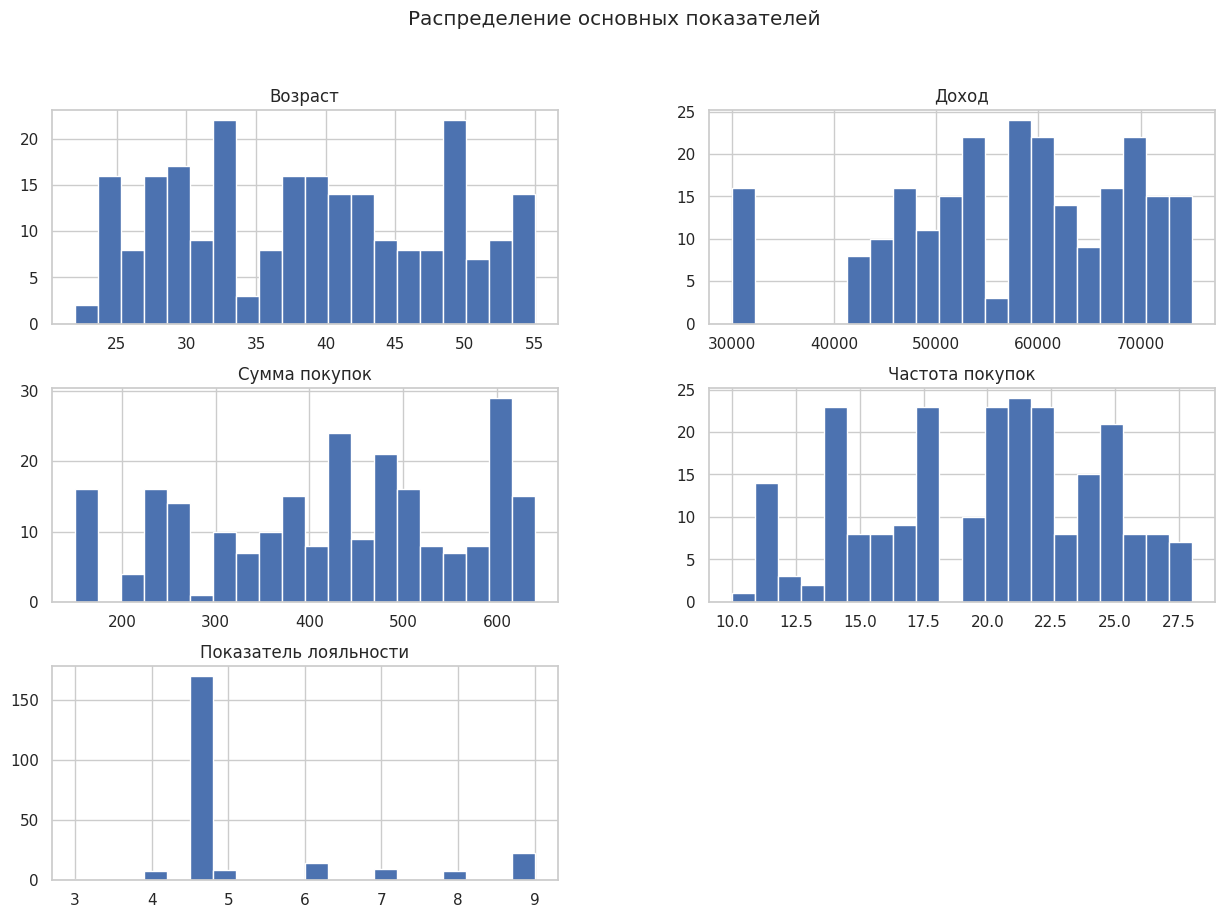

In [ ]:
# Гистограммы распределения числовых данных
data.hist(column=['Возраст', 'Доход', 'Сумма покупок', 'Частота покупок', 'Показатель лояльности'], bins=20, figsize=(15, 10))
plt.suptitle("Распределение основных показателей")
plt.show()

In [ ]:
# Анализ по регионам
# Группируем данные по регионам и считаем средние значения
region_summary = data.groupby('Регион').mean()
print("Средние значения по регионам:\n", region_summary)

Средние значения по регионам:
              Номер    Возраст         Доход  Сумма покупок  \
Регион                                                       
East     16.833333  31.666667  49000.000000     320.000000   
North   122.141026  34.358974  53038.461538     358.589744   
South   121.649351  38.000000  55766.233766     416.883117   
West    122.675325  44.272727  64129.870130     510.519481   

        Показатель лояльности  Частота покупок  
Регион                                          
East                 4.281667        16.666667  
North                4.923333        17.653846  
South                5.424805        19.467532  
West                 5.402338        22.545455  


Text(0.5, 1.0, 'Распределение доходов по регионам')

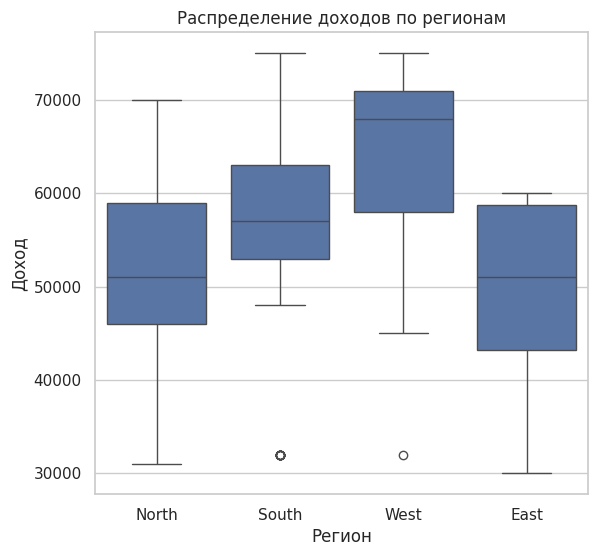

In [ ]:
# Визуализация доходов и лояльности по регионам
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Регион', y='Доход', data=data)
plt.title("Распределение доходов по регионам")

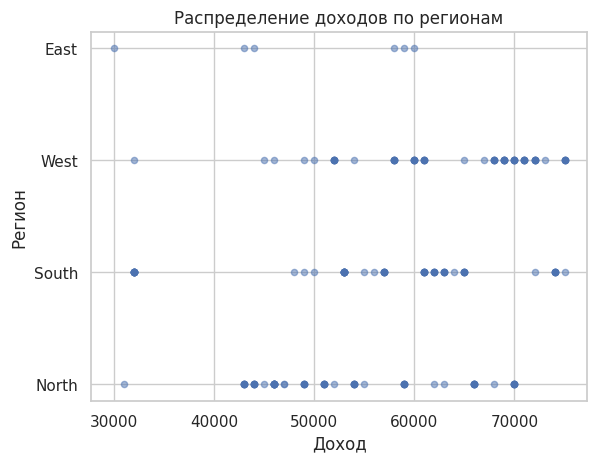

In [ ]:
### Визуализация: диаграммы рассеяния дохода по регионам и суммы покупок
data.plot.scatter(x='Доход', y='Регион', alpha=0.5)
plt.title('Распределение доходов по регионам')
plt.xlabel('Доход')
plt.ylabel('Регион')
plt.show()

In [ ]:
# Средние значения характеристик по возрастным группам
age_bins = [0, 30, 50, 100]
age_labels = ['Молодые', 'Средний возраст', 'Пожилые']
data['Возрастная группа'] = pd.cut(data['Возраст'], bins=age_bins, labels=age_labels)

# Группировка и вычисление средних значений
age_region_summary = data.groupby(['Регион', 'Возрастная группа']).mean(numeric_only=True)

# Замена NaN на 0
age_region_summary = age_region_summary.fillna(0)

# Вывод результатов
print("Средние значения характеристик по регионам и возрастным группам:\n", age_region_summary)

Средние значения характеристик по регионам и возрастным группам:
                                Номер    Возраст         Доход  Сумма покупок  \
Регион Возрастная группа                                                       
East   Молодые             10.666667  25.000000  39000.000000     206.666667   
       Средний возраст     23.000000  38.333333  59000.000000     433.333333   
       Пожилые              0.000000   0.000000      0.000000       0.000000   
North  Молодые            123.297297  27.756757  45162.162162     250.270270   
       Средний возраст    121.097561  40.317073  60146.341463     456.341463   
       Пожилые              0.000000   0.000000      0.000000       0.000000   
South  Молодые            126.933333  24.733333  34200.000000     186.000000   
       Средний возраст    120.471698  39.056604  58792.452830     446.226415   
       Пожилые            119.777778  53.888889  73888.888889     628.888889   
West   Молодые             21.750000  26.750000  43000

<ipython-input-17-3c25ed2f04ac>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_region_summary = data.groupby(['Регион', 'Возрастная группа']).mean(numeric_only=True)


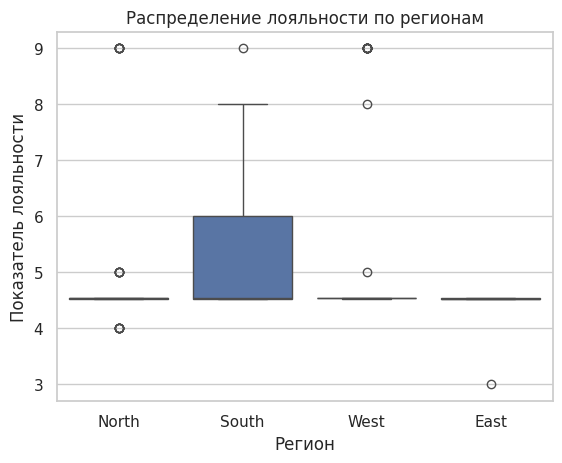

In [ ]:
plt.subplot(1, 1, 1)
sns.boxplot(x='Регион', y='Показатель лояльности', data=data)
plt.title("Распределение лояльности по регионам")
plt.show()
# Анализ лояльности клиентов между регионами

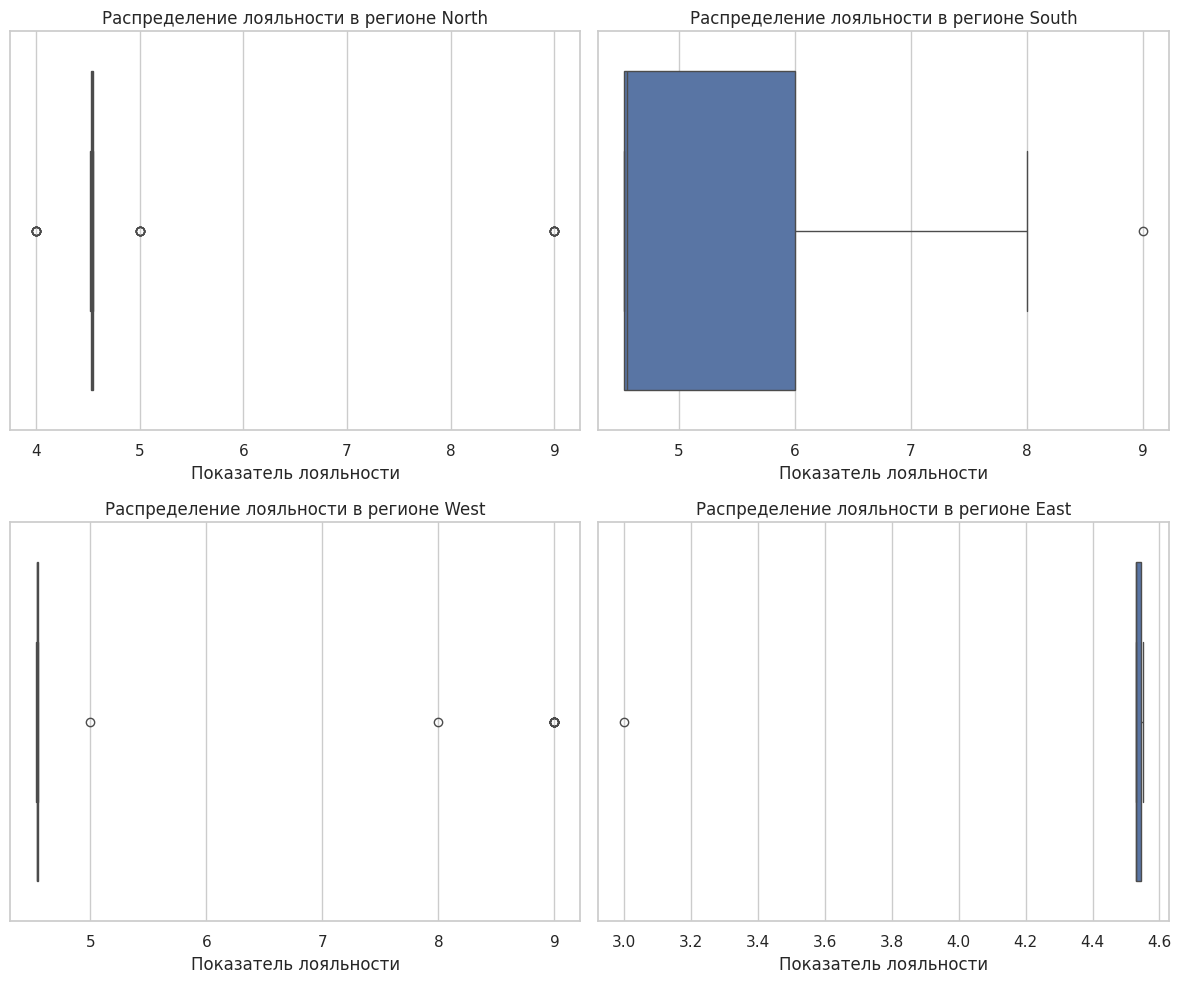

In [ ]:
### Анализ лояльности по регионам с раздельными графиками для лучшей визуализации
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
regions = data['Регион'].unique()
for i, region in enumerate(regions):
    row, col = i // 2, i % 2
    sns.boxplot(x=data[data['Регион'] == region]['Показатель лояльности'], ax=ax[row, col])
    ax[row, col].set_title(f'Распределение лояльности в регионе {region}')
plt.tight_layout()
plt.show()

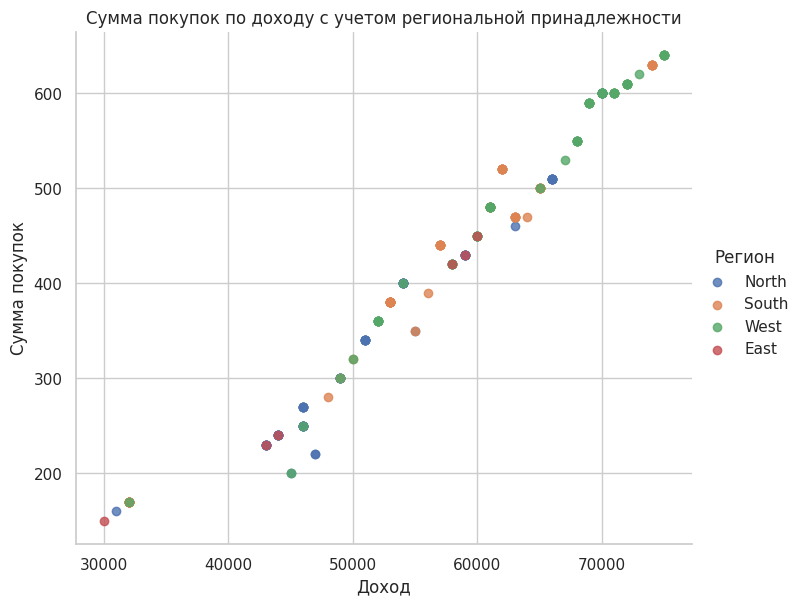

In [ ]:
# Диаграмма рассеяния с линейной моделью (lmplot) для анализа суммы покупок по доходу с учетом лояльности
ax = sns.lmplot(x='Доход', y='Сумма покупок', hue='Регион', data=data, fit_reg=False, height=6, aspect=1.2)
ax.set_xlabels('Доход')
ax.set_ylabels('Сумма покупок')
plt.title('Сумма покупок по доходу с учетом региональной принадлежности')
plt.show()

Шаг 4: Сегментация клиентов методом кластеризации

Применим кластеризацию KMeans, чтобы выделить группы клиентов на основе их характеристик. Для этого сначала нормализуем данные для повышения точности модели.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Выбор и нормализация данных для кластеризации
features = data[['Возраст', 'Доход', 'Сумма покупок', 'Частота покупок', 'Показатель лояльности']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Оптимизация и применение KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
# Присвоение описательных имен кластерам на основе анализа
cluster_labels = {
    0: 'клиенты 50+ с высоким доходом',
    1: 'клиенты 20+ с низким доходом',
    2: 'Клиенты 30+ со среднем доходом',
    3: 'клиенты 40+ с доходом выше среднего'
}
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_summary = data.groupby('Cluster_Label')[numeric_columns].mean()

# Печать характеристик кластеров для проверки
print("Характеристики кластеров:\n", cluster_summary)

Характеристики кластеров:
                                           Номер    Возраст         Доход  \
Cluster_Label                                                              
Клиенты 30+ со среднем доходом       120.470588  38.450980  58323.529412   
клиенты 20+ с низким доходом         112.705882  27.338235  43088.235294   
клиенты 40+ с доходом выше среднего  127.172414  48.862069  68862.068966   
клиенты 50+ с высоким доходом        123.102564  51.461538  71461.538462   

                                     Сумма покупок  Показатель лояльности  \
Cluster_Label                                                               
Клиенты 30+ со среднем доходом          437.254902               4.958137   
клиенты 20+ с низким доходом            244.264706               4.510294   
клиенты 40+ с доходом выше среднего     572.413793               8.758621   
клиенты 50+ с высоким доходом           602.307692               4.537692   

                                     Частота покупок 

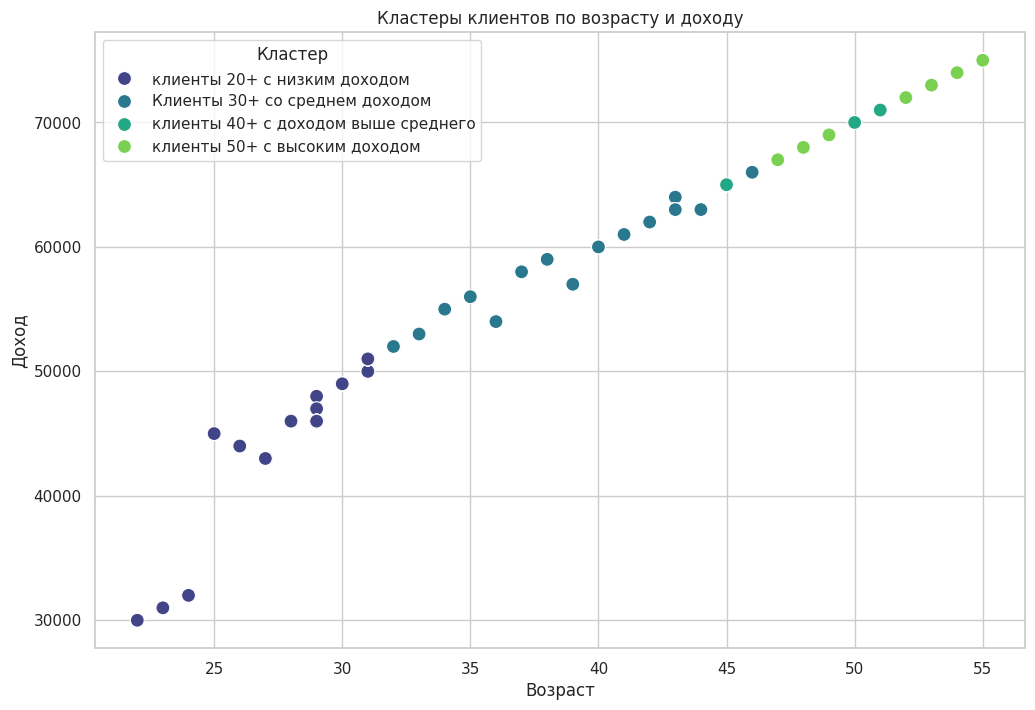

In [ ]:
# Визуализация кластеров с добавленными описательными названиями
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Возраст'], y=data['Доход'], hue=data['Cluster_Label'], palette='viridis', s=100)
plt.title('Кластеры клиентов по возрасту и доходу')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.legend(title='Кластер')
plt.show()


In [ ]:
# Подготовка данных и разделение на обучающую и тестовую выборки
X = data[['Возраст', 'Доход', 'Частота покупок']]
y = data['Сумма покупок']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели линейной регрессии
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Оценка точности модели
y_pred = reg_model.predict(X_test)
print("Среднеквадратичная ошибка (MSE):", mean_squared_error(y_test, y_pred))
print("Коэффициент детерминации (R^2):", r2_score(y_test, y_pred))


Среднеквадратичная ошибка (MSE): 164.6460151353937
Коэффициент детерминации (R^2): 0.9926250385157719


In [ ]:
# Пример предсказаний для новых данных
new_customers = pd.DataFrame({
    'Возраст': [25, 40, 50],
    'Доход': [40000, 60000, 70000],
    'Частота покупок': [15, 20, 25]
})

# Предсказание суммы покупок для новых клиентов
new_predictions = reg_model.predict(new_customers)
new_customers['Прогнозируемая сумма покупок'] = new_predictions

print("Прогнозируемая сумма покупок для новых клиентов:\n", new_customers)

Прогнозируемая сумма покупок для новых клиентов:
    Возраст  Доход  Частота покупок  Прогнозируемая сумма покупок
0       25  40000               15                    254.674128
1       40  60000               20                    440.142272
2       50  70000               25                    588.298503
